In [29]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [16]:
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import RandomNormal #here we are using random normal initialization
from keras.models import Sequential #Here we are importing sequential models
from keras.layers import Dense, Activation #Here we are importing dense layers and activation functions
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x,vy,ty,ax,colors = ['b']):#We will use this function to plot training loss and cross validation loss as a-
    # function of epoch
    #We are calling it a dynamic plot because as soon as each epoch is over, I want to update this plot
    ax.plot(x,vy,'b',label = 'Validation Loss')
    #x = number of epochs we want to run
    # vy = list of cross validation loss we got during each epoch
    # ty = list of training loss we got during each epoch
    # ax = labels for our x and y axis
    ax.plot(x,ty,'r',label = 'Train Loss')
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
(x_tr,y_tr),(x_test,y_test) = mnist.load_data() #loading train and test datasets

In [4]:
print(x_tr.shape) #it shows us the (number of datapoints in x_tr, shape of each datapoint(here it is (28,28)))
# x_tr.shape[0] = 60000
# x_tr.shape[1] = 28
# x_tr.shape[2] = 28

(60000, 28, 28)


In [5]:
print(x_test.shape)#it shows us the (number of datapoints in x_test, shape of each datapoint(here it is (28,28)))
# x_test.shape[0] = 10000
# x_test.shape[1] = 28
# x_test.shape[2] = 28

(10000, 28, 28)


In [6]:
#Now we will convert shape of each datapoint (image) in train and test from 28 x 28 to 1 x 784
x_tr = x_tr.reshape(x_tr.shape[0],x_tr.shape[1]*x_tr.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [7]:
print(x_tr.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
#An example of datapoint
x_tr[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [9]:
#Now we can see that each datapoint or image in our mnist dataset is a vector having dimensional values ranging from 0 to 255-
# Now we will normalize each of the datapoint in our mnist dataset
x_tr = x_tr/255
x_test = x_test/255

In [10]:
#an example of datapoint after normalizing
x_tr[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
y_tr[0]

5

In [14]:
#Above we can see that our class label is a number. So lets now convert our clas label into a 10 dimensional vector.
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs
y_tr = np_utils.to_categorical(y_tr,10) #converting each class label in train dataset into a 10 dim vector. Here I am using-
#- np_utils for one-hot encoding.
y_test = np_utils.to_categorical(y_test,10)

In [15]:
y_tr[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
output_dim = 10 #indicates number of dimensions in output layer or number of ouputs coming out of output layer
input_dim = x_tr.shape[1] #indicates number of dimensions in input layer or number of inputs coming into input layer
batch_size = 128
nb_epoch = 20

## 1.) 2-hidden layers + ReLU + Batch-Norm + Dropout + Adam

In [17]:
# Here for relu we have used Xavier/Golorot normal initialization
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1) in case of batch-
#- normalization layer.
# h1 =>  σ=√(2/(n_i+n_i+1) = 0.039  => N(0,σ) = N(0,0.039) 
# h2 =>  σ=√(2/(n_i+n_i+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(n_i+n_i+1) = 0.120  => N(0,σ) = N(0,0.120)
# Here n_i = number of inputs coming into current hidden layer from previous layer = fan_in
# n_i+1 = number of inputs going out of current hidden layer into next layer = fan_out
model = Sequential()
model.add(Dense(512,activation = 'relu',input_shape = (input_dim,),kernel_initializer = RandomNormal(mean = 0.0,stddev = 0.39,seed = None))) 
          # Here the first hidden layer is dense and has 512-
          #- relu activation units, which means it generates 512 outputs, input_shape is used for first hidden layer-
          #- (in an MLP) to determine the number of inputs coming into the first-
          #- hidden layer. The activation units we are using in first hidden layer are sigmoid units.
          # kernel means weight
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128,activation = 'relu',kernel_initializer = RandomNormal(mean = 0.0,stddev = 0.55,seed = None)))#we dont need to define the input_dim to 2nd hidden layer as it pre understood-
          #- by keras that the number of inputs to 2nd hidden layer = number of outputs from 1st hidden layer
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(output_dim,activation = 'softmax'))
model.summary()
#for 1st and 2nd hidden layer above we have done random normal initialization of weights

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total para

In [18]:
#defining the optimizer, loss function and metric
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [19]:
history = model.fit(x_tr,y_tr,batch_size = batch_size,epochs = nb_epoch,verbose = 1,validation_data = (x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 277us/step - loss: 0.9301 - acc: 0.7104 - val_loss: 0.2747 - val_acc: 0.9194
Epoch 2/20
60000/60000 [==============================] - 12s 207us/step - loss: 0.4184 - acc: 0.8700 - val_loss: 0.2064 - val_acc: 0.9378
Epoch 3/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.3244 - acc: 0.9018 - val_loss: 0.1711 - val_acc: 0.9472
Epoch 4/20
60000/60000 [==============================] - 12s 203us/step - loss: 0.2742 - acc: 0.9169 - val_loss: 0.1461 - val_acc: 0.9540
Epoch 5/20
60000/60000 [==============================] - 11s 187us/step - loss: 0.2399 - acc: 0.9268 - val_loss: 0.1308 - val_acc: 0.9580
Epoch 6/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.2139 - acc: 0.9349 - val_loss: 0.1183 - val_acc: 0.9642
Epoch 7/20
60000/60000 [==============================] - 12s 195us/step - loss: 0.1920 - acc: 0.9417 - val_loss: 0.

10000/10000 [==============================] - 1s 110us/step
Test loss 0.06673744473877596
Test accuracy 0.9802


<IPython.core.display.Javascript object>


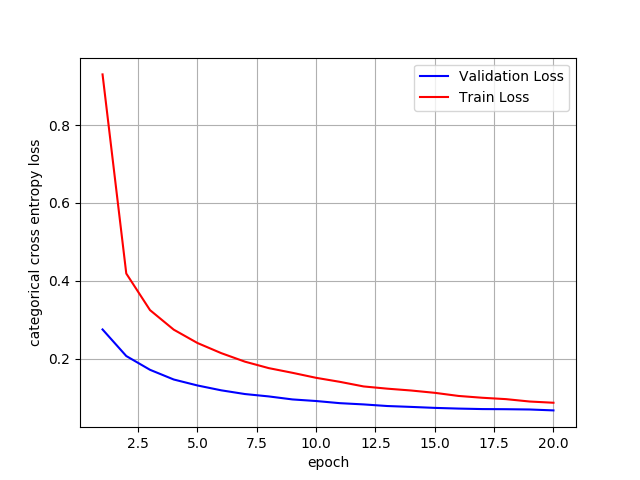

In [20]:
score = model.evaluate(x_test,y_test)
print('Test loss',score[0])
print('Test accuracy',score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');ax.set_ylabel('categorical cross entropy loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x,vy,ty,ax)

## 2.) 3-hidden layers + ReLU + Batch-Norm + Dropout + Adam

In [21]:
# Here for relu we have used Xavier/Golorot normal initialization
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1) in case of batch-
#- normalization layer.
# h1 =>  σ=√(2/(n_i+n_i+1) = 0.039  => N(0,σ) = N(0,0.039) 
# h2 =>  σ=√(2/(n_i+n_i+1) = 0.051  => N(0,σ) = N(0,0.051)
# h3 =>  σ=√(2/(n_i+n_i+1) = 0.072  => N(0,σ) = N(0,0.72)
# Here n_i = number of inputs coming into current hidden layer from previous layer = fan_in
# n_i+1 = number of inputs going out of current hidden layer into next layer = fan_out
model = Sequential()
model.add(Dense(512,activation = 'relu',input_shape = (input_dim,),kernel_initializer = RandomNormal(mean = 0.0,stddev = 0.39,seed = None))) 
          # Here the first hidden layer is dense and has 512-
          #- relu activation units, which means it generates 512 outputs, input_shape is used for first hidden layer-
          #- (in an MLP) to determine the number of inputs coming into the first-
          #- hidden layer. The activation units we are using in first hidden layer are sigmoid units.
          # kernel means weight
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256,activation = 'relu',kernel_initializer = RandomNormal(mean = 0.0,stddev = 0.051,seed = None)))#we dont need to define the input_dim to 2nd hidden layer as it pre understood-
          #- by keras that the number of inputs to 2nd hidden layer = number of outputs from 1st hidden layer
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128,activation = 'relu',kernel_initializer = RandomNormal(mean = 0.0,stddev = 0.072,seed = None)))#we dont need to define the input_dim to 2nd hidden layer as it pre understood-
          #- by keras that the number of inputs to 2nd hidden layer = number of outputs from 1st hidden layer
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(output_dim,activation = 'softmax'))
model.summary()
#for 1st and 2nd hidden layer above we have done random normal initialization of weights

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
__________

In [22]:
#defining the optimizer, loss function and metric
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [23]:
history = model.fit(x_tr,y_tr,batch_size = batch_size,epochs = nb_epoch,verbose = 1,validation_data = (x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 307us/step - loss: 0.7123 - acc: 0.7792 - val_loss: 0.1996 - val_acc: 0.9375
Epoch 2/20
60000/60000 [==============================] - 15s 251us/step - loss: 0.3389 - acc: 0.8966 - val_loss: 0.1452 - val_acc: 0.9543
Epoch 3/20
60000/60000 [==============================] - 12s 203us/step - loss: 0.2602 - acc: 0.9208 - val_loss: 0.1253 - val_acc: 0.9605
Epoch 4/20
60000/60000 [==============================] - 13s 221us/step - loss: 0.2184 - acc: 0.9338 - val_loss: 0.1088 - val_acc: 0.9670
Epoch 5/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.1927 - acc: 0.9414 - val_loss: 0.0976 - val_acc: 0.9696
Epoch 6/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.1676 - acc: 0.9489 - val_loss: 0.0903 - val_acc: 0.9720
Epoch 7/20
60000/60000 [==============================] - 13s 216us/step - loss: 0.1531 - acc: 0.9532 - val_loss: 0.

10000/10000 [==============================] - 1s 91us/step
Test loss 0.061646096301364015
Test accuracy 0.9816


<IPython.core.display.Javascript object>


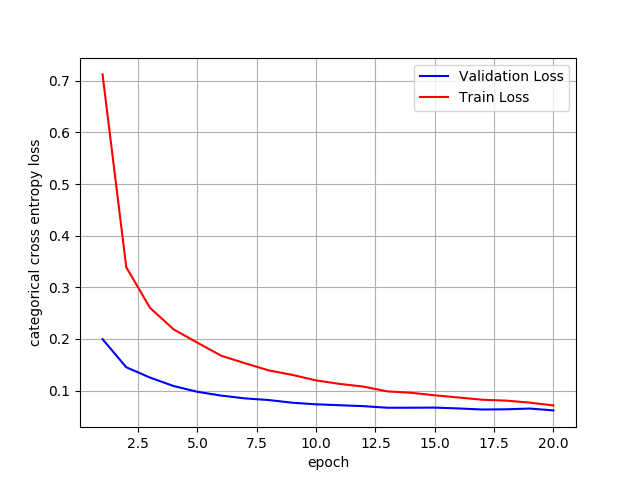

In [24]:
score = model.evaluate(x_test,y_test)
print('Test loss',score[0])
print('Test accuracy',score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');ax.set_ylabel('categorical cross entropy loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x,vy,ty,ax)

## 3.) 5-hidden layers + ReLU + Batch-Norm + Dropout + Adam

In [25]:
# Here for relu we have used Xavier/Golorot normal initialization
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1) in case of batch-
#- normalization layer.
# h1 =>  σ=√(2/(n_i+n_i+1) = 0.039  => N(0,σ) = N(0,0.039) 
# h2 =>  σ=√(2/(n_i+n_i+1) = 0.055  => N(0,σ) = N(0,0.051)
# h3 =>  σ=√(2/(n_i+n_i+1) = 0.120  => N(0,σ) = N(0,0.72)
# h4 =>  σ=√(2/(n_i+n_i+1) = 0.120  => N(0,σ) = N(0,0.102)
# h5 =>  σ=√(2/(n_i+n_i+1) = 0.120  => N(0,σ) = N(0,0.144)
# Here n_i = number of inputs coming into current hidden layer from previous layer = fan_in
# n_i+1 = number of inputs going out of current hidden layer into next layer = fan_out
model = Sequential()
model.add(Dense(512,activation = 'relu',input_shape = (input_dim,),kernel_initializer = RandomNormal(mean = 0.0,stddev = 0.39,seed = None))) 
          # Here the first hidden layer is dense and has 512-
          #- relu activation units, which means it generates 512 outputs, input_shape is used for first hidden layer-
          #- (in an MLP) to determine the number of inputs coming into the first-
          #- hidden layer. The activation units we are using in first hidden layer are sigmoid units.
          # kernel means weight
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256,activation = 'relu',kernel_initializer = RandomNormal(mean = 0.0,stddev = 0.051,seed = None)))#we dont need to define the input_dim to 2nd hidden layer as it pre understood-
          #- by keras that the number of inputs to 2nd hidden layer = number of outputs from 1st hidden layer
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128,activation = 'relu',kernel_initializer = RandomNormal(mean = 0.0,stddev = 0.072,seed = None)))#we dont need to define the input_dim to 2nd hidden layer as it pre understood-
          #- by keras that the number of inputs to 2nd hidden layer = number of outputs from 1st hidden layer
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64,activation = 'relu',kernel_initializer = RandomNormal(mean = 0.0,stddev = 0.102,seed = None)))#we dont need to define the input_dim to 2nd hidden layer as it pre understood-
          #- by keras that the number of inputs to 2nd hidden layer = number of outputs from 1st hidden layer
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32,activation = 'relu',kernel_initializer = RandomNormal(mean = 0.0,stddev = 0.144,seed = None)))#we dont need to define the input_dim to 2nd hidden layer as it pre understood-
          #- by keras that the number of inputs to 2nd hidden layer = number of outputs from 1st hidden layer
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(output_dim,activation = 'softmax'))
model.summary()
#for 1st and 2nd hidden layer above we have done random normal initialization of weights

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
__________

In [26]:
#defining the optimizer, loss function and metric
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [27]:
history = model.fit(x_tr,y_tr,batch_size = batch_size,epochs = nb_epoch,verbose = 1,validation_data = (x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 305us/step - loss: 1.5595 - acc: 0.4894 - val_loss: 0.4276 - val_acc: 0.8897
Epoch 2/20
60000/60000 [==============================] - 13s 225us/step - loss: 0.7181 - acc: 0.7838 - val_loss: 0.2508 - val_acc: 0.9303
Epoch 3/20
60000/60000 [==============================] - 14s 235us/step - loss: 0.5079 - acc: 0.8601 - val_loss: 0.1934 - val_acc: 0.9460
Epoch 4/20
60000/60000 [==============================] - 14s 229us/step - loss: 0.4093 - acc: 0.8947 - val_loss: 0.1623 - val_acc: 0.9553
Epoch 5/20
60000/60000 [==============================] - 14s 227us/step - loss: 0.3584 - acc: 0.9107 - val_loss: 0.1460 - val_acc: 0.9588
Epoch 6/20
60000/60000 [==============================] - 14s 228us/step - loss: 0.3111 - acc: 0.9239 - val_loss: 0.1342 - val_acc: 0.9652
Epoch 7/20
60000/60000 [==============================] - 14s 227us/step - loss: 0.2846 - acc: 0.9320 - val_loss: 0.

10000/10000 [==============================] - 1s 111us/step
Test loss 0.08112061827145517
Test accuracy 0.9795


<IPython.core.display.Javascript object>


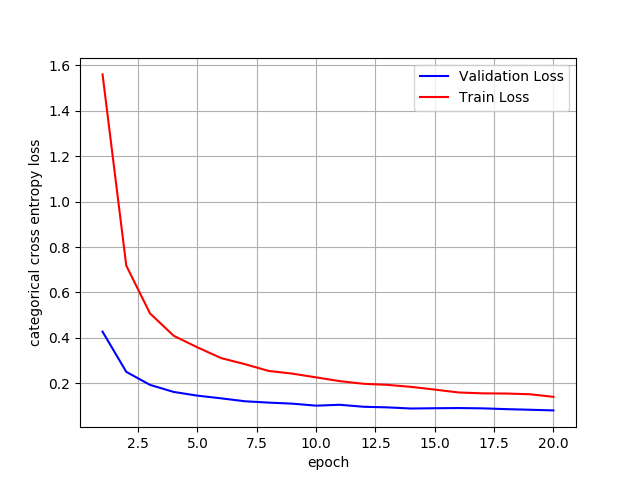

In [28]:
score = model.evaluate(x_test,y_test)
print('Test loss',score[0])
print('Test accuracy',score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');ax.set_ylabel('categorical cross entropy loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x,vy,ty,ax)